## Resumen


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

%run "../util/funciones.ipynb"

In [2]:
#Carga de datos
df=pd.read_csv('../data/processed/output.csv')
df.head(10)

perimeter_worst  area_worst  radius_worst  perimeter_mean  radius_mean  \
0            99.70       711.2        15.110           87.46       13.540   
1            96.09       630.5        14.500           85.63       13.080   
2            65.13       314.9        10.230           60.34        9.504   
3            84.46       545.9        13.300           82.61       13.030   
4            57.26       242.2         8.964           51.71        8.196   
5            89.88       582.6        13.760           78.04       12.050   
6            99.00       698.8        15.150           86.91       13.490   
7            82.98       516.5        12.980           74.72       11.760   
8            96.08       656.7        14.670           87.21       13.640   
9            83.67       527.2        13.100           75.71       11.940   

   area_se  area_mean  perimeter_se  texture_worst  texture_mean  radius_se  \
0   23.560      566.3         2.058          19.26         14.36     0.2699   
1   14.670      520.0         1.383          20.49         15.71     0.1852   
2   15.700      273.9         1.909          15.66         12.44     0.2773   
3   14.160      523.8         1.170          22.81         18.42     0.1839   
4    8.205      201.9         1.094          21.96         16.84     0.1563   
5   19.870      449.3         1.848          20.70         14.63     0.2636   
6   20.200      561.0         1.735          31.82         22.30     0.2338   
7   28.470      427.9         2.635          25.72         21.60     0.4062   
8   14.550      571.8         1.449          23.19         16.34     0.1872   
9   17.470      437.6         1.520          21.33         18.24     0.2273   

   concavity_worst  compactness_worst  concave points_worst  diagnosis  
0          0.23900            0.17730               0.12880          0  
1          0.18900            0.27760               0.07283          0  
2          0.08867            0.11480               0.06227          0  
3          0.04833            0.04619               0.05013          0  
4          0.06880            0.13570               0.02564          0  
5          0.30500            0.21560               0.06548          0  
6          0.22820            0.17110               0.12820          0  
7          0.05523            0.08615               0.03715          0  
8          0.10500            0.15820               0.08586          0  
9          0.09203            0.08906               0.06296          0

Limpieza y modificación del dataset

EDA

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707 entries, 0 to 1706
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   perimeter_worst       1707 non-null   float64
 1   area_worst            1707 non-null   float64
 2   radius_worst          1707 non-null   float64
 3   perimeter_mean        1707 non-null   float64
 4   radius_mean           1707 non-null   float64
 5   area_se               1707 non-null   float64
 6   area_mean             1707 non-null   float64
 7   perimeter_se          1707 non-null   float64
 8   texture_worst         1707 non-null   float64
 9   texture_mean          1707 non-null   float64
 10  radius_se             1707 non-null   float64
 11  concavity_worst       1707 non-null   float64
 12  compactness_worst     1707 non-null   float64
 13  concave points_worst  1707 non-null   float64
 14  diagnosis             1707 non-null   int64  
dtypes: float64(14), int64

In [4]:
df.describe()

perimeter_worst   area_worst  radius_worst  perimeter_mean  \
count      1707.000000  1707.000000   1707.000000     1707.000000   
mean        120.208394  1097.084382     18.156497      102.338293   
std          38.984300   702.241081      5.686936       27.870323   
min          50.410000   185.200000      7.930000       43.790000   
25%          92.325085   619.397551     13.988427       82.776758   
50%         107.700908   799.600000     16.429058       95.248300   
75%         144.983648  1493.875857     21.649404      118.559141   
max         281.471268  4850.529508     40.910949      210.419964   

       radius_mean      area_se    area_mean  perimeter_se  texture_worst  \
count  1707.000000  1707.000000  1707.000000   1707.000000    1707.000000   
mean     15.685153    59.236195   744.269766      3.798497      29.298363   
std       4.141541    59.275706   357.352446      2.633137       6.700861   
min       6.981000     6.802000   143.500000     -1.068207      12.020000   
25%      12.770000    23.396429   512.073910      2.040170      24.723592   
50%      14.715360    32.130816   646.270887      3.038806      28.940000   
75%      18.148302    88.348493   880.468052      4.916530      33.518842   
max      31.985974   604.259727  2635.306447     27.133976      56.203999   

       texture_mean    radius_se  concavity_worst  compactness_worst  \
count   1707.000000  1707.000000      1707.000000        1707.000000   
mean      21.884470     0.565084         0.391843           0.336826   
std        4.725375     0.882544         0.819804           0.822466   
min        9.710000    -2.683123        -2.742923          -2.596145   
25%       18.605000     0.182586         0.037684           0.058837   
50%       21.540000     0.422200         0.312000           0.254800   
75%       24.746887     1.039649         0.821486           0.739822   
max       42.378628     5.423196         3.639660           3.022246   

       concave points_worst    diagnosis  
count           1707.000000  1707.000000  
mean               0.154030     0.372583  
std                0.805770     0.483634  
min               -2.953758     0.000000  
25%               -0.139854     0.000000  
50%                0.108488     0.000000  
75%                0.470055     1.000000  
max                2.818785     1.000000

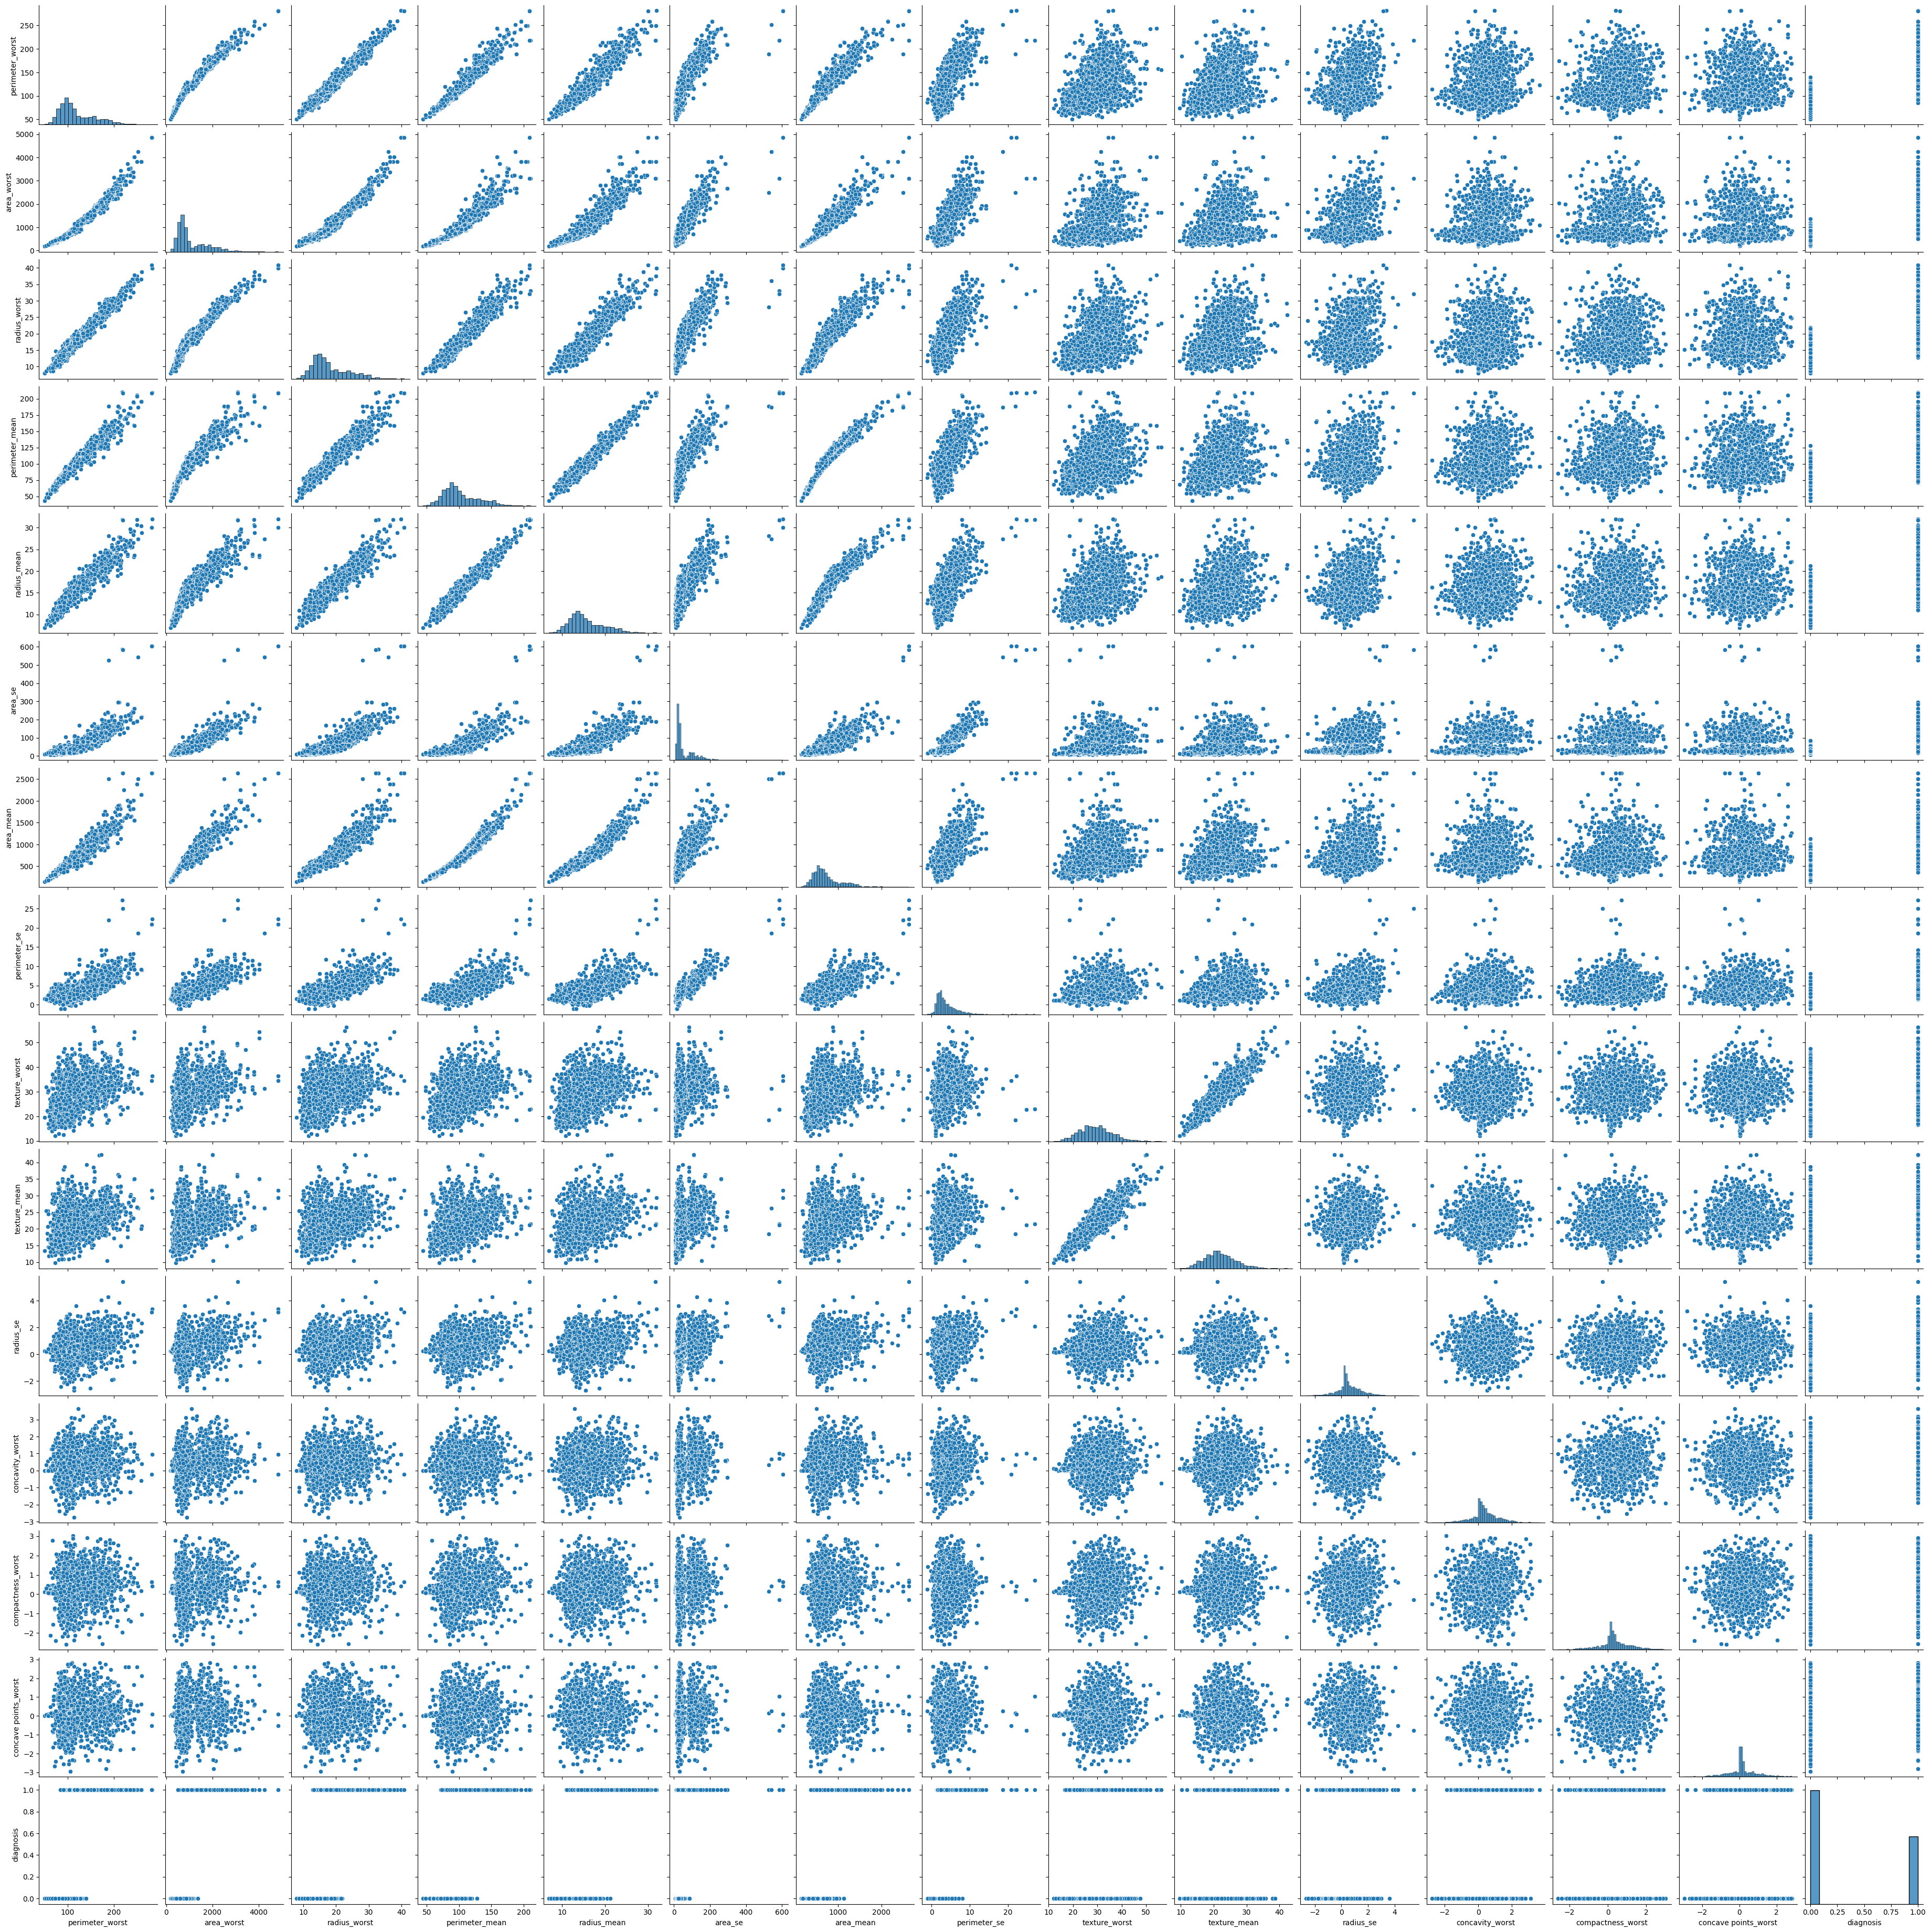

In [5]:
sns.pairplot(df)

<Axes: >

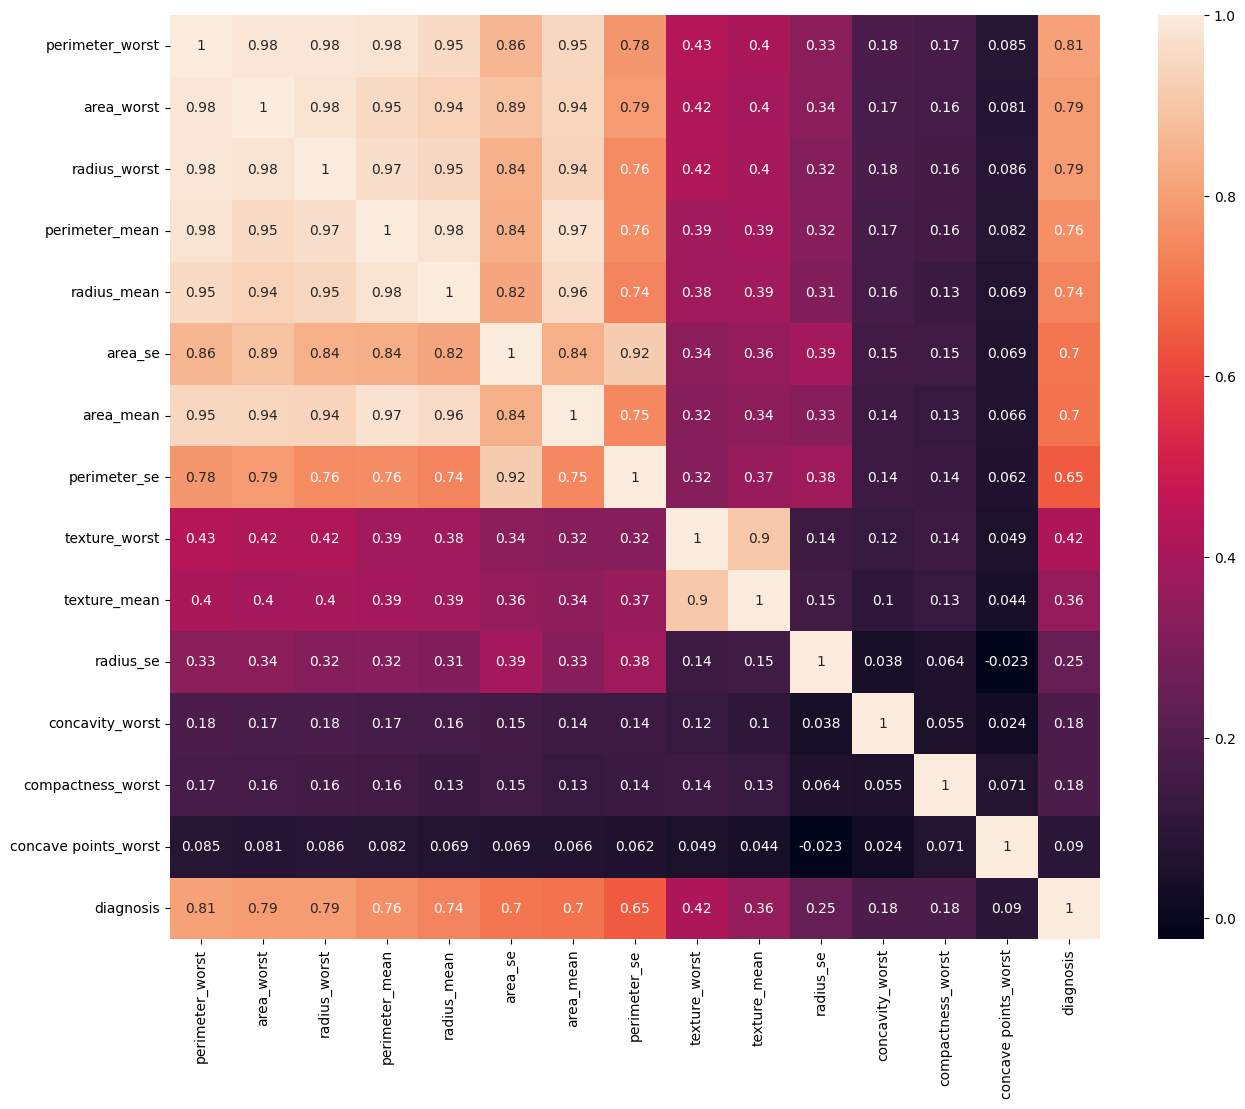

In [7]:
#heatmap correlaciones
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), annot=True)

Train & Test

In [8]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.25,
                                                   random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## MODELOS

LogisticRegression

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_scaled, y_train)

In [ ]:
predicciones_log_reg = log_reg.predict(x_test_scaled)
print(classification_report(y_test, predicciones_log_reg))

In [ ]:
log_reg.score(x_test_scaled, y_test)

In [ ]:
c_matrix_log_reg = confusion_matrix(y_test, predicciones_log_reg)
sns.heatmap(c_matrix_log_reg, annot=True)
print(c_matrix_log_reg)

In [ ]:
matriz_porcentajes(c_matrix_log_reg)

In [ ]:
curva_ROC('log_reg',log_reg,x_test_scaled,y_test)

Regresión logística con Grid y Validación cruzada

In [ ]:
param_grid = {'max_iter':[1000,2000,3000]}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall')
grid_search.fit(x_train_scaled, y_train)
mejores_parametros_log_reg = grid_search.best_params_
mejor_modelo_log_reg = grid_search.best_estimator_
rendimiento_log_reg = cross_val_score(mejor_modelo_log_reg, x_train_scaled, y_train, cv=5, scoring='recall')
rendimiento_medio_log_reg = rendimiento_log_reg.mean()
print('mejores parametros:',mejores_parametros_log_reg)
print('rendimiento_ medio recall:',rendimiento_medio_log_reg)

DecisionTreeClassifier

In [ ]:
tree_clas = DecisionTreeClassifier(max_depth=3,random_state=42)
tree_clas.fit(x_train_scaled,y_train)

In [ ]:
predicciones_tree = tree_clas.predict(x_test_scaled)
print(classification_report(y_test, predicciones_tree))

In [ ]:
tree_clas.score(x_test_scaled,y_test)

In [ ]:
tree_clas.feature_importances_

In [ ]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clas,filled = True)

In [ ]:
c_matrix_tree = confusion_matrix(y_test, predicciones_tree)
sns.heatmap(c_matrix_tree, annot=True)
print(c_matrix_tree)

In [ ]:
matriz_porcentajes(c_matrix_tree)

In [ ]:
curva_ROC('Decision Tree',tree_clas,x_test_scaled,y_test)

Ensembled RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rnd_clf = RandomForestClassifier(n_estimators=100,
                                 max_features=3,
                                 random_state=42)

cv_scores = cross_val_score(rnd_clf, x_train_scaled, y_train, cv=5, scoring='recall')
print("Resultados de Validación Cruzada:", cv_scores)
print("Precisión Media recall: {:.2f}".format(cv_scores.mean()))


In [ ]:
rnd_clf.fit(x_train_scaled,y_train)

In [ ]:
predicciones_rnd_clf = rnd_clf.predict(x_test_scaled)
print(classification_report(y_test, predicciones_rnd_clf))

In [ ]:
rnd_clf.score(x_test_scaled,y_test)

In [ ]:
c_matrix_rnd_clf = confusion_matrix(y_test, predicciones_rnd_clf)
sns.heatmap(c_matrix_rnd_clf, annot=True)
print(c_matrix_rnd_clf)

In [ ]:
matriz_porcentajes(c_matrix_rnd_clf)

In [ ]:
curva_ROC('Mejor Randomforest',rnd_clf,x_test_scaled,y_test)

Ensembled RadomForestClasifier GridSearchCV y cross_val

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rnd_clf = RandomForestClassifier(n_estimators=100,
                                 max_features=3,
                                 random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': [2, 3, 4]
}

grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring='recall')
grid_search.fit(x_train_scaled, y_train)
mejores_parametros_ens_ran = grid_search.best_params_
mejor_modelo_ens_ran = grid_search.best_estimator_

cv_scores = cross_val_score(mejor_modelo_ens_ran, x_train_scaled, y_train, cv=5, scoring='recall')
print("Resultados de Validación Cruzada:", cv_scores)
print("Precisión Media recall: {:.2f}".format(cv_scores.mean()))

In [ ]:
predicciones_ens_ran = mejor_modelo_ens_ran.predict(x_test_scaled)
print(classification_report(y_test, predicciones_ens_ran))

In [ ]:
mejor_modelo_ens_ran.score(x_test_scaled,y_test)

In [ ]:
c_matrix_ens_ran = confusion_matrix(y_test, predicciones_ens_ran)
sns.heatmap(c_matrix_ens_ran, annot=True)
print(c_matrix_ens_ran)

In [ ]:
matriz_porcentajes(c_matrix_ens_ran)

In [ ]:
curva_ROC('Mejor Ensembled Randomforest',mejor_modelo_ens_ran,x_test_scaled,y_test)

## conclusiones

El mejor modelo en cuanto metricas es el ensembled RandomForest, seguido del RandomForest y de decision Tree. Aun así, para la metrica más importante, el recall, todas se diferencian en menos de 4%. Si a esto añadimos que en el entorno medicco, ademas de un buen recall se valora que el modelo sea entendible, por lo que opte por el decisiontree